In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [11]:
url = "http://bit.ly/w-data"
input_data = pd.read_csv(url)

In [12]:
input_data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


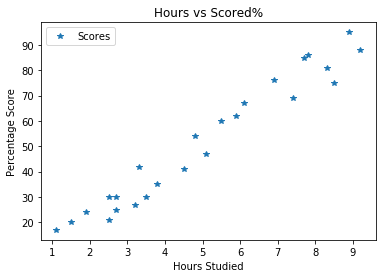

In [63]:
input_data.plot(x='Hours', y='Scores', style='*')  #plotting the s_data
plt.title('Hours vs Scored%') #title of the plot  
plt.xlabel('Hours Studied')  #x label
plt.ylabel('Percentage Score')  #y label
plt.show() #for displaying

In [29]:
input_X = input_data.iloc[:, 0].values  
input_Y = input_data.iloc[:, 1].values 
print(input_X)

[2.5 5.1 3.2 8.5 3.5 1.5 9.2 5.5 8.3 2.7 7.7 5.9 4.5 3.3 1.1 8.9 2.5 1.9
 6.1 7.4 2.7 4.8 3.8 6.9 7.8]


In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
model=LinearRegression()

In [34]:
from sklearn.model_selection import train_test_split

In [36]:
train_X,test_X, train_Y,test_Y =train_test_split(input_X,input_Y,test_size=0.2,random_state=0)

In [39]:
train_X=train_X.reshape(-1,1)
model=model.fit(train_X,train_Y)
#trained the model

In [46]:
test_X=test_X.reshape(-1,1)
predictions= model.predict(test_X)
for i in range(len(test_X)):
    print("input :"+str(test_X[i])+" predicted : "+str(predictions[i])+" actual : "+str(test_Y[i]))

input :[1.5] predicted : 16.884144762398048 actual : 20
input :[3.2] predicted : 33.73226077948985 actual : 27
input :[7.4] predicted : 75.35701799818723 actual : 69
input :[2.5] predicted : 26.79480124304028 actual : 30
input :[5.9] predicted : 60.49103327722388 actual : 62


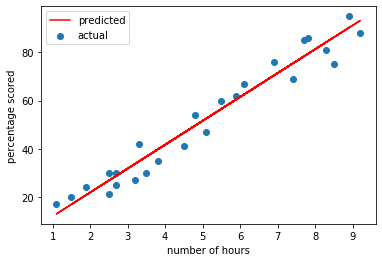

In [112]:
line = model.coef_*input_X+model.intercept_
plt.scatter(input_X, input_Y,label='actual')
plt.xlabel('number of hours')
plt.ylabel('percentage scored')

plt.plot(input_X,line,c='red',label='predicted');
plt.legend()
plt.show()

In [113]:
df = pd.DataFrame({'Actual': test_Y, 'Predicted': predictions})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [117]:
hours = [[9.25]]
own_pred = model.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737535


In [121]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(test_Y, predictions))

Mean Absolute Error: 4.183859899002975
